In [21]:
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [22]:
troca = {
    0 : 1,
    1 : 0
}

df["finished"] = df.unfinished.map(troca)
df.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='expected_hours', ylabel='price'>

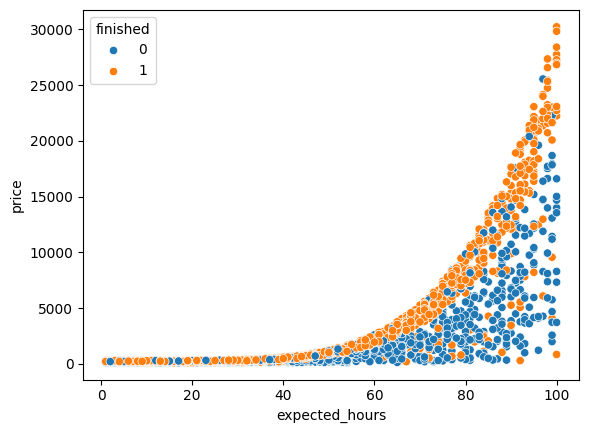

In [23]:
import seaborn as sns

sns.scatterplot(x="expected_hours",y="price",hue="finished",data=df)

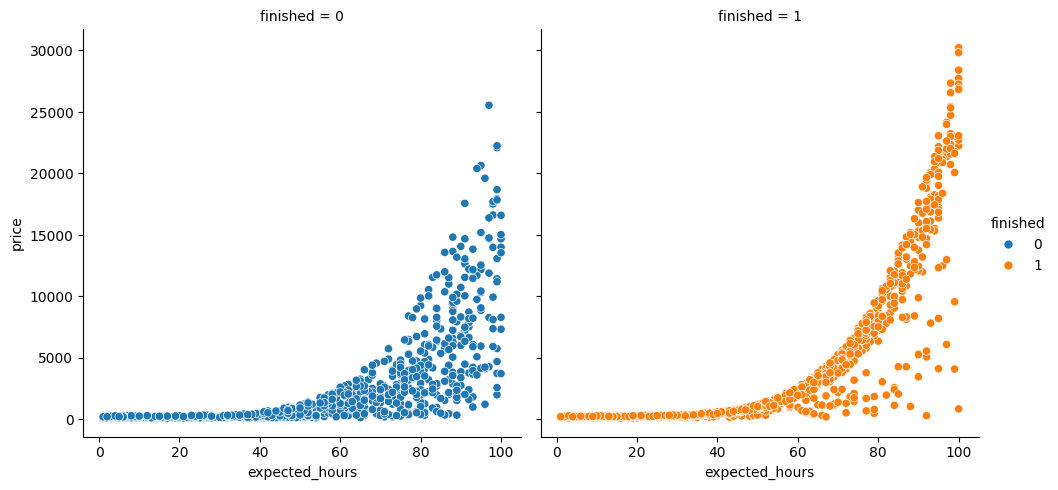

In [24]:
sns.relplot(x="expected_hours",y="price",hue="finished", col="finished",data=df)

In [25]:
X = df[["expected_hours","price"]]
y = df["finished"]

In [36]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 20
np.random.seed(SEED)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 1617 elementos e faremos o teste com 540 elementos
A acurácia foi 51.48 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
teste = np.ones(540)

acuracia = accuracy_score(y_test, teste)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 1617 elementos e faremos o teste com 540 elementos
A acurácia foi 52.59 %


<Axes: xlabel='expected_hours', ylabel='price'>

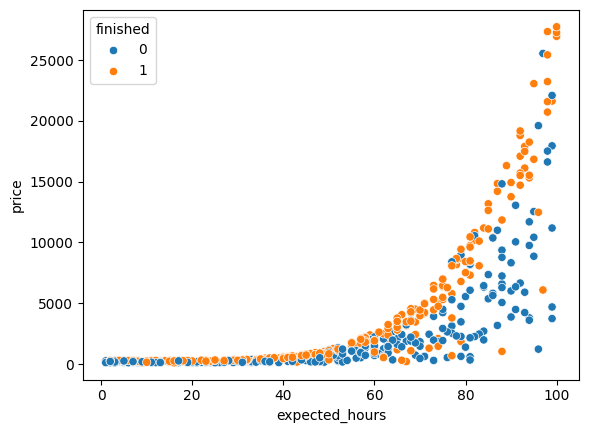

In [38]:
sns.scatterplot(x="expected_hours",y="price",hue=y_test,data=X_test)

In [39]:
x_min = X_test["expected_hours"].min()
x_max = X_test["expected_hours"].max()
y_min = X_test["price"].min()
y_max = X_test["price"].max()
print(x_min,x_max,y_min,y_max)



1 100 101 27738


In [40]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [41]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [42]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

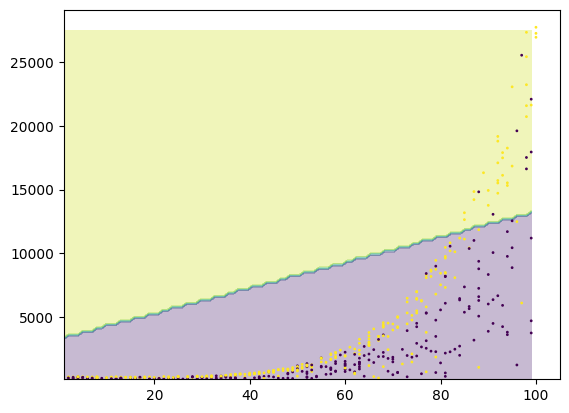

In [43]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(X_test["expected_hours"],X_test["price"],c=y_test,s=1)

In [44]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

modelo = SVC(gamma="auto")
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")

Treinaremos o modelo com 1617 elementos e faremos o teste com 540 elementos
A acurácia foi 57.78 %


In [45]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

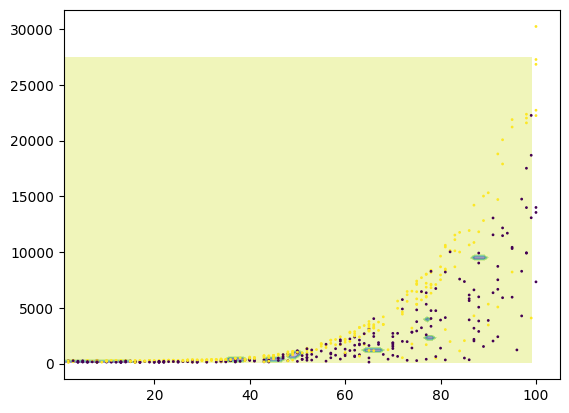

In [46]:
plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(X_test["expected_hours"],X_test["price"],c=y_test,s=1)

In [47]:
from sklearn.preprocessing import StandardScaler

raw_X_train,raw_X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,stratify = y)

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

modelo = SVC(gamma="auto")
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
print(f"Treinaremos o modelo com {len(X_train)} elementos e faremos o teste com {len(X_test)} elementos")
print(f"A acurácia foi {acuracia*100:.2f} %")


Treinaremos o modelo com 1617 elementos e faremos o teste com 540 elementos
A acurácia foi 66.85 %


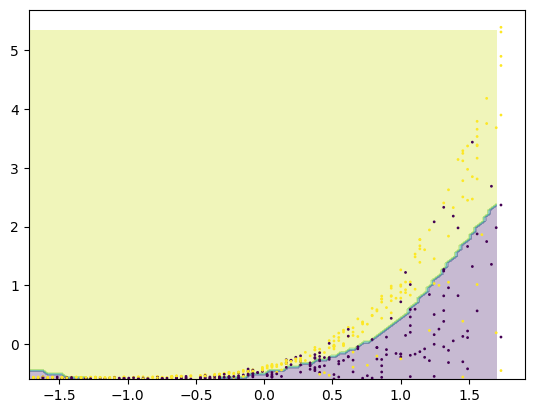

In [49]:
x_min = X_test[:,0].min()
x_max = X_test[:,0].max()
y_min = X_test[:,1].min()
y_max = X_test[:,1].max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s=1)